# Ejercicio 3: Representación Gráfica de Vectores de Documentos y Consultas,

## Objetivo de la práctica,
- Comprender la representación de documentos y consultas en el modelo de espacio vectorial, mediante el cálculo de matrices término-documento usando medidas como TF y TF-IDF.,
- Aplicar la similitud coseno para comparar documentos con consultas, y utilizarla para recuperar y ordenar documentos según su relevancia.",
- Visualizar de forma intuitiva los vectores de documentos y consultas, mediante reducción de dimensionalidad y representación gráfica en el plano, para facilitar la interpretación geométrica de la recuperación de información.

## Parte 1: Construcción de la matriz término-documento y TF-IDF",

### Actividad",
1. Usa el siguiente corpus de 4 documentos.",
2. Vectoriza los documentos usando:",
   - Frecuencia absoluta (TF)",
   - TF-IDF",
3. Visualiza los documentos como un gráfico de dispersión 2D y 3D."

In [22]:
# Install pandas if not already installed
%pip install pandas

import pandas as pd

  Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl.metadata (19 kB)
Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl (11.6 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\roble\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]

documents

['El gato se escondió debajo de la cama.',
 'La cama estaba limpia y cómoda.',
 'El perro y el gato jugaron en el jardín.',
 'La limpieza del jardín es importante.']

In [12]:
documents[0].lower().strip('.')

'el gato se escondió debajo de la cama'

In [13]:
vocab = set()
for doc in documents:
    for word in doc.lower().strip('.').split():
        vocab.add(word)
print (len(vocab))

20


In [19]:
dict_tf = {}
i=0
for doc in documents:
    dict_tfd = {}
    for term in vocab:
        count = doc.lower().strip('.').count(term)
        dict_tfd[term] = count
    #print (doc, dict_tfd)
    dict_tf[doc] = dict_tfd
    i =+ 1
print (dict_tf)


{'El gato se escondió debajo de la cama.': {'en': 0, 'y': 0, 'jardín': 0, 'limpieza': 0, 'escondió': 1, 'cama': 1, 'debajo': 1, 'estaba': 0, 'el': 1, 'limpia': 0, 'perro': 0, 'del': 0, 'se': 1, 'importante': 0, 'la': 1, 'gato': 1, 'es': 1, 'jugaron': 0, 'de': 2, 'cómoda': 0}, 'La cama estaba limpia y cómoda.': {'en': 0, 'y': 1, 'jardín': 0, 'limpieza': 0, 'escondió': 0, 'cama': 1, 'debajo': 0, 'estaba': 1, 'el': 0, 'limpia': 1, 'perro': 0, 'del': 0, 'se': 0, 'importante': 0, 'la': 1, 'gato': 0, 'es': 1, 'jugaron': 0, 'de': 0, 'cómoda': 1}, 'El perro y el gato jugaron en el jardín.': {'en': 1, 'y': 1, 'jardín': 1, 'limpieza': 0, 'escondió': 0, 'cama': 0, 'debajo': 0, 'estaba': 0, 'el': 3, 'limpia': 0, 'perro': 1, 'del': 0, 'se': 0, 'importante': 0, 'la': 0, 'gato': 1, 'es': 0, 'jugaron': 1, 'de': 0, 'cómoda': 0}, 'La limpieza del jardín es importante.': {'en': 0, 'y': 0, 'jardín': 1, 'limpieza': 1, 'escondió': 0, 'cama': 0, 'debajo': 0, 'estaba': 0, 'el': 1, 'limpia': 0, 'perro': 0, 'de

In [23]:
matriz = pd.DataFrame(dict_tf)
matriz

,El gato se escondió debajo de la cama.,La cama estaba limpia y cómoda.,El perro y el gato jugaron en el jardín.,La limpieza del jardín es importante.
en,0,0,1,0
y,0,1,1,0
jardín,0,0,1,1
limpieza,0,0,0,1
escondió,1,0,0,0
cama,1,1,0,0
debajo,1,0,0,0
estaba,0,1,0,0
el,1,0,3,1
limpia,0,1,0,0


In [26]:
matriz.to_csv('matriz_tf.csv', index=True, header=True)

In [31]:
%pip install scikit-learn
%pip install matplotlib

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\roble\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Using cached matplotlib-3.10.3-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
Using cached matplotlib-3.10.3-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl (222 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\roble\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


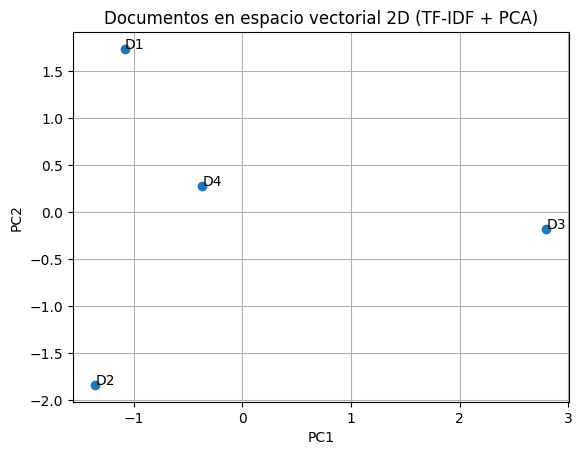

In [32]:
# Representación TF


# Representación TF-IDF

# Reducción PCA y visualización 2D
pca = PCA(n_components=2)
docs_2d = pca.fit_transform(matriz.T)
docs_2d


plt.scatter(docs_2d[:,0], docs_2d[:,1])
for i, txt in enumerate(["D1", "D2", "D3", "D4"]):
    plt.annotate(txt, (docs_2d[i,0], docs_2d[i,1]))
plt.title("Documentos en espacio vectorial 2D (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()

# Reducción PCA y visualización 3D

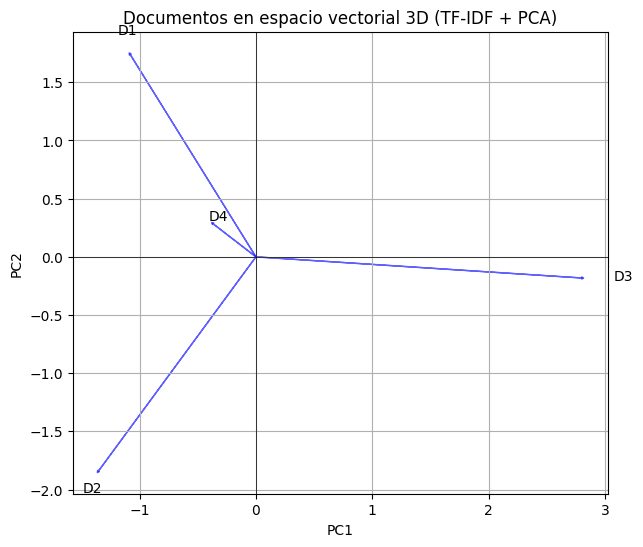

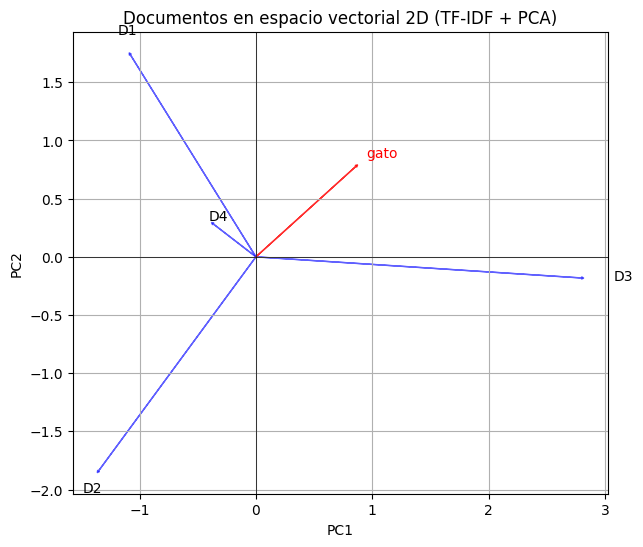

In [37]:
plt.figure(figsize=(10, 6))
for i, (x,y) in enumerate(docs_2d):
    plt.arrow(0,  0, x, y, head_width=0.02, head_length=0.02, fc='blue', ec='blue', alpha=0.6)
    plt.text(x * 1.1, y *1.1, f"D{i+1}", fontsize=10)

plt.title("Documentos en espacio vectorial 3D (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Redibujar la gráfica con todos los vectores
plt.figure(figsize=(10, 6))
for i, (x, y) in enumerate(docs_2d):
    plt.arrow(0, 0, x, y, head_width=0.02, head_length=0.02, fc='blue', ec='blue', alpha=0.6)
    plt.text(x * 1.1, y * 1.1, f"D{i+1}", fontsize=10)

# Añadir el vector de "gato" a la misma gráfica
if "gato" in vocab:
    plt.arrow(0, 0, vector_gato[0], vector_gato[1], head_width=0.02, head_length=0.02, fc='red', ec='red', alpha=0.8)
    plt.text(vector_gato[0] * 1.1, vector_gato[1] * 1.1, "gato", fontsize=10, color='red')

plt.title("Documentos en espacio vectorial 2D (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


## Parte 2: Representación de la consulta como vector",

### Actividad",
1. Ingresa una consulta como texto.",
2. Representa la consulta en el mismo espacio vectorial que los documentos.",
3. Calcula similitud coseno entre la consulta y cada documento.",
4. Visualiza la consulta como un vector en el mismo espacio vectorial que los documentos."

In [40]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

#1: Ingresar una consulta como texto
query = "El gato está en el jardín."

#2: Representar la consulta como un vector en el mismo espacio que los documentos
query_vector = np.array([query.lower().count(term) for term in vocab])

#3: Calcular la similitud coseno entre la consulta y los documentos 
doc_vectors = matriz.T.values
cosine_similarities = cosine_similarity([query_vector], doc_vectors)[0]
for i, similarity in enumerate(cosine_similarities):
    print(f"Similitud con los documentos {i+1}: {similarity:.4f}")



Similitud con los documentos 1: 0.4082
Similitud con los documentos 2: 0.1336
Similitud con los documentos 3: 0.8216
Similitud con los documentos 4: 0.5000


C:\Users\roble\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


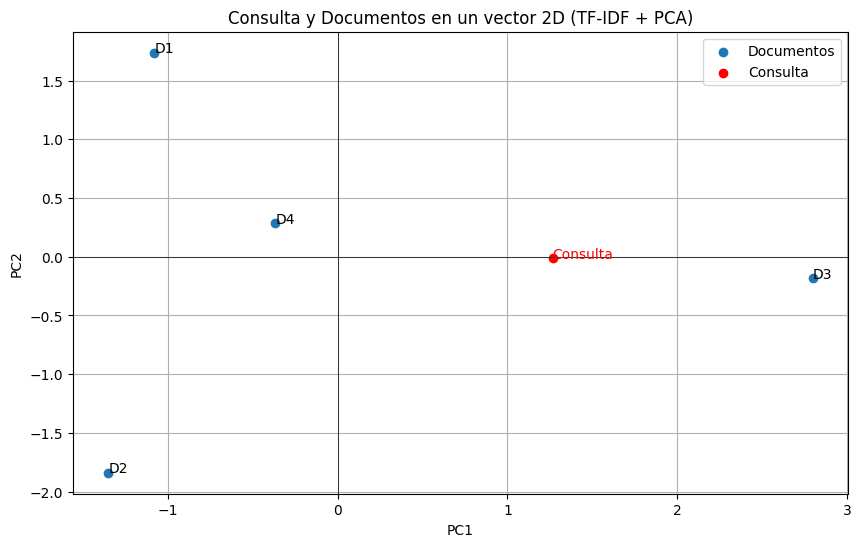

In [41]:
# Step 4: Visualize the query as a vector in the same space
query_2d = pca.transform([query_vector])

plt.figure(figsize=(10, 6))
plt.scatter(docs_2d[:, 0], docs_2d[:, 1], label="Documentos")
for i, txt in enumerate(["D1", "D2", "D3", "D4"]):
    plt.annotate(txt, (docs_2d[i, 0], docs_2d[i, 1]))

plt.scatter(query_2d[0, 0], query_2d[0, 1], color='red', label="Consulta")
plt.annotate("Consulta", (query_2d[0, 0], query_2d[0, 1]), color='red')

plt.title("Consulta y Documentos en un vector 2D (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid(True)
plt.legend()
plt.show()

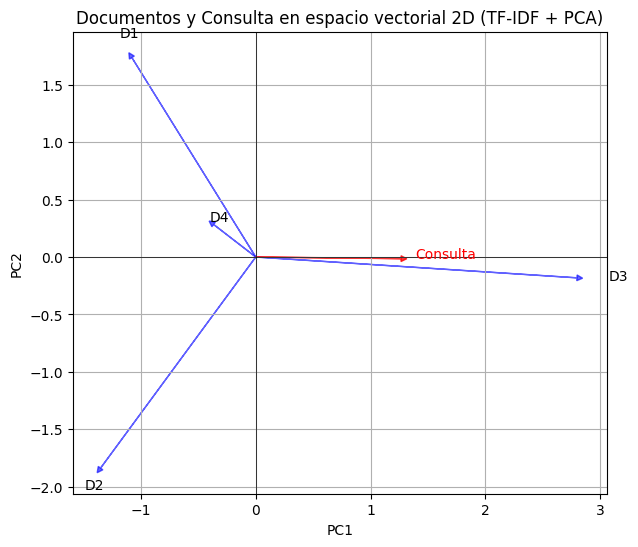

In [42]:
plt.figure(figsize=(10, 6))

# Dibujar flechas desde el origen hacia cada documento
for i, (x, y) in enumerate(docs_2d):
    plt.arrow(0, 0, x, y, head_width=0.05, head_length=0.05, fc='blue', ec='blue', alpha=0.6)
    plt.text(x * 1.1, y * 1.1, f"D{i+1}", fontsize=10)

# Dibujar flecha desde el origen hacia la consulta
plt.arrow(0, 0, query_2d[0, 0], query_2d[0, 1], head_width=0.05, head_length=0.05, fc='red', ec='red', alpha=0.8)
plt.text(query_2d[0, 0] * 1.1, query_2d[0, 1] * 1.1, "Consulta", fontsize=10, color='red')

plt.title("Documentos y Consulta en espacio vectorial 2D (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## Parte 3: Consulta por similitud y ranking de documentos

### Actividad
1. Con la misma representación de vectores, implementar una función que devuelva los documentos más relevantes a una consulta usando similitud coseno.
2. Dibuja los vectores (de documentos y de consulta) como flechas desde el origen usando `plt.quiver()` o `plt.arrow()`"

In [ ]:
def retrieve_documents(query, documents, vocab, top_n=None):
    # Crear vector de consulta
    query_vector = np.array([query.lower().count(term) for term in vocab])
    # Crear vectores de documentos
    doc_vectors = matriz.T.values
    # Calcular semejanzas coseno
    cosine_sims = cosine_similarity([query_vector], doc_vectors)[0]
    # Crear una lista ordenada de pares (doc_index, similitud)
    ranked_docs = [(i, sim) for i, sim in enumerate(cosine_sims)]
    # Ordenar por similitud en orden descendente
    ranked_docs.sort(key=lambda x: x[1], reverse=True)
    # Devuelve top_n documentos si se especifica
    if top_n is not None:
        ranked_docs = ranked_docs[:top_n]
    
    return ranked_docs

In [47]:
# Prueba con una consulta de ejemplo
test_query = "El gato está en el jardín."
results = retrieve_documents(test_query, documents, vocab, top_n=3)
# Mostrar resultados
print("Consulta:", test_query)
for rank, (doc_idx, sim) in enumerate(results, 1):
    print(f"Rank {rank}: Documento {doc_idx+1}, Similitud: {sim:.4f}")
    print(f"   {documents[doc_idx]}")

Consulta: El gato está en el jardín.
Rank 1: Documento 3, Similitud: 0.8216
   El perro y el gato jugaron en el jardín.
Rank 2: Documento 4, Similitud: 0.5000
   La limpieza del jardín es importante.
Rank 3: Documento 1, Similitud: 0.4082
   El gato se escondió debajo de la cama.


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


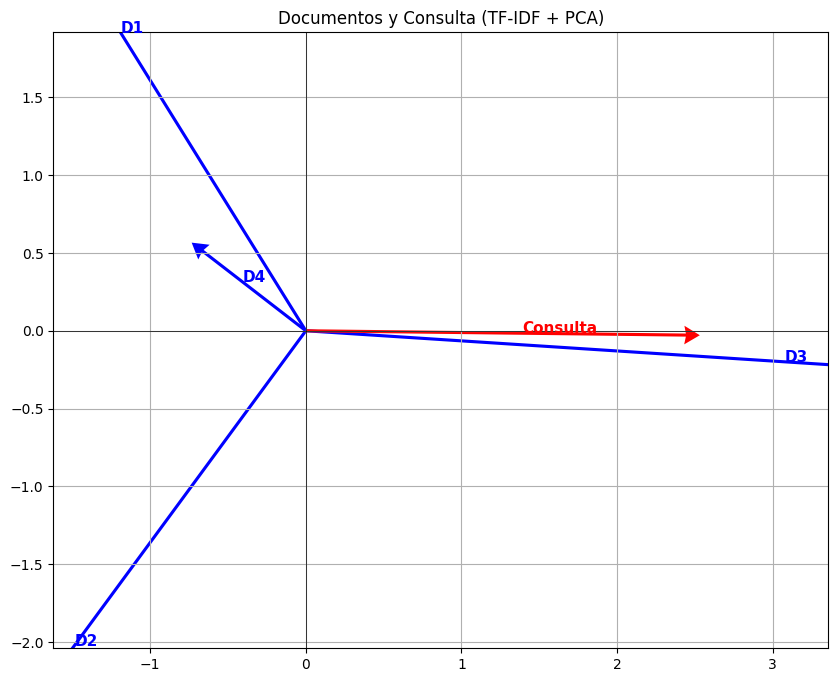

In [51]:
plt.figure(figsize=(10, 8))

# Origen para todos los vectores
origins = np.zeros((len(docs_2d) + 1, 2))  # +1 para la consulta

# Vectores de documentos y consulta
vectors = np.vstack([docs_2d, query_2d])
colors = ['blue'] * len(docs_2d) + ['red']

# Dibujar todos los vectores de una sola vez con quiver
Q = plt.quiver(origins[:, 0], origins[:, 1], 
               vectors[:, 0], vectors[:, 1], 
               color=colors, angles='xy', scale_units='xy', scale=0.5,
               width=0.004, headwidth=6)

# Etiquetas simples
labels = [f"D{i+1}" for i in range(len(docs_2d))] + ["Consulta"]
for i, (x, y) in enumerate(vectors):
    plt.text(x*1.1, y*1.1, labels[i], 
             color=colors[i], fontweight='bold', fontsize=11)

# Configuración básica
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title("Documentos y Consulta (TF-IDF + PCA)")
plt.axis('equal')  # Mantener escala igual en ambos ejes

# Ajustar los límites para que se vea todo
margin = 1.2
plt.xlim(vectors[:, 0].min() * margin, vectors[:, 0].max() * margin)
plt.ylim(vectors[:, 1].min() * margin, vectors[:, 1].max() * margin)

plt.show()